In [ ]:
# TODO: add in-notebook pose error evaluation

In [1]:
import sys
import os
import orbslam2
import time
import cv2
from tqdm import tnrange, tqdm_notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import ConnectionPatch
import numpy as np
import pykitti
import math
import glob
from util import *

sys.path.append("..")
from eval.pose_evaluation_utils import *
from dataloader import *
from orbslam import *

VOCAB_PATH = '/Users/dewalgupta/Documents/ucsd/lab/slam/pySLAM/Vocabulary/ORBvoc.txt'

In [24]:
# data = euroc_dataset(4, skip_preprocess=True)
data = aqualoc_dataset(7, skip_preprocess=False)

Loaded 2261 frames.


In [25]:
points, pose, inverse_pose, tframe = orbslam(data.image_fnames, data.times, VOCAB_PATH, data.settings_file) 

-----
Start processing sequence ...
Images in the sequence: 2261



-----
median tracking time: 0.026890039443969727
mean tracking time: 0.026946474102312143


In [26]:
print(len(tframe))
print(tframe[0], tframe[-1])
# print(tframe)
# tframe_to_img = {}
# for i in range(len(data.times)):
#     tframe_to_img[data.times[i]] = data.image_fnames[i]

84
0.0 36.866896992


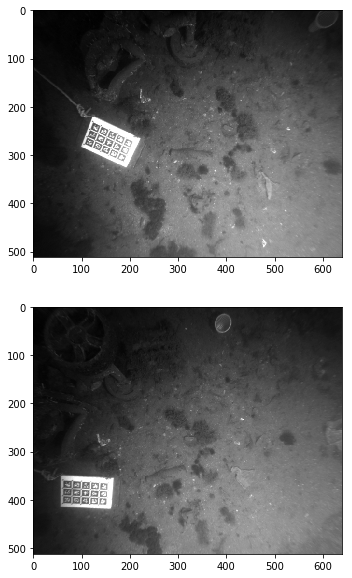

In [27]:
f1 = 1
f2 = 3
img1 = data.get_frame(tframe[f1])
img2 = data.get_frame(tframe[f2])
# img2 = mpimg.imread(tframe_to_img[tframe[f2]])

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.imshow(img1, cmap='gray')
plt.subplot(2, 1, 2)
plt.imshow(img2, cmap='gray')
plt.show()

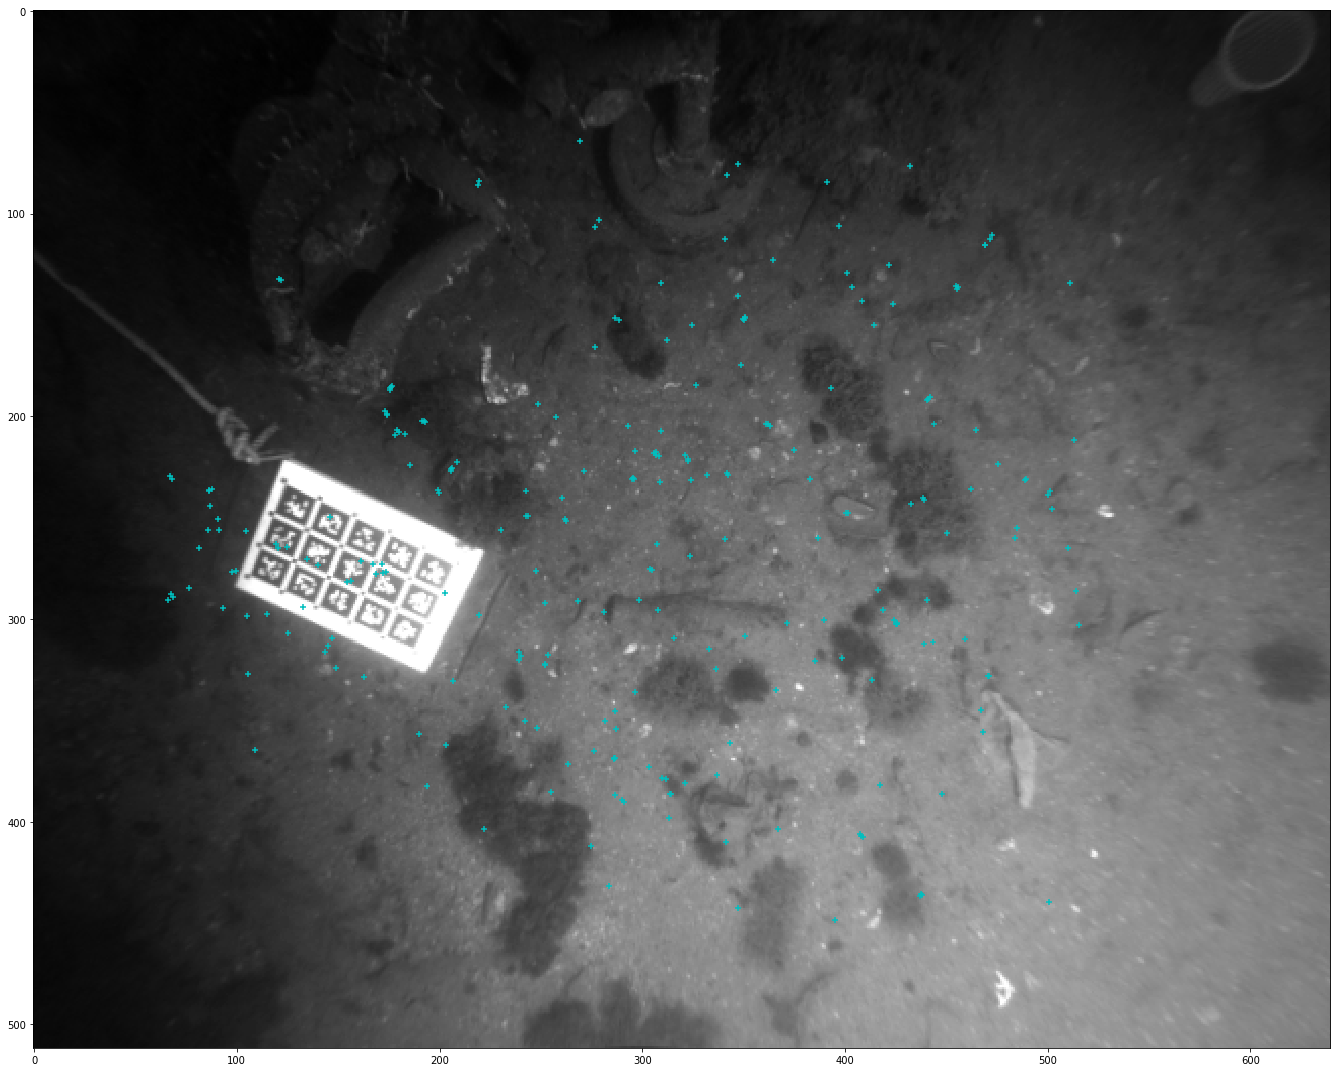

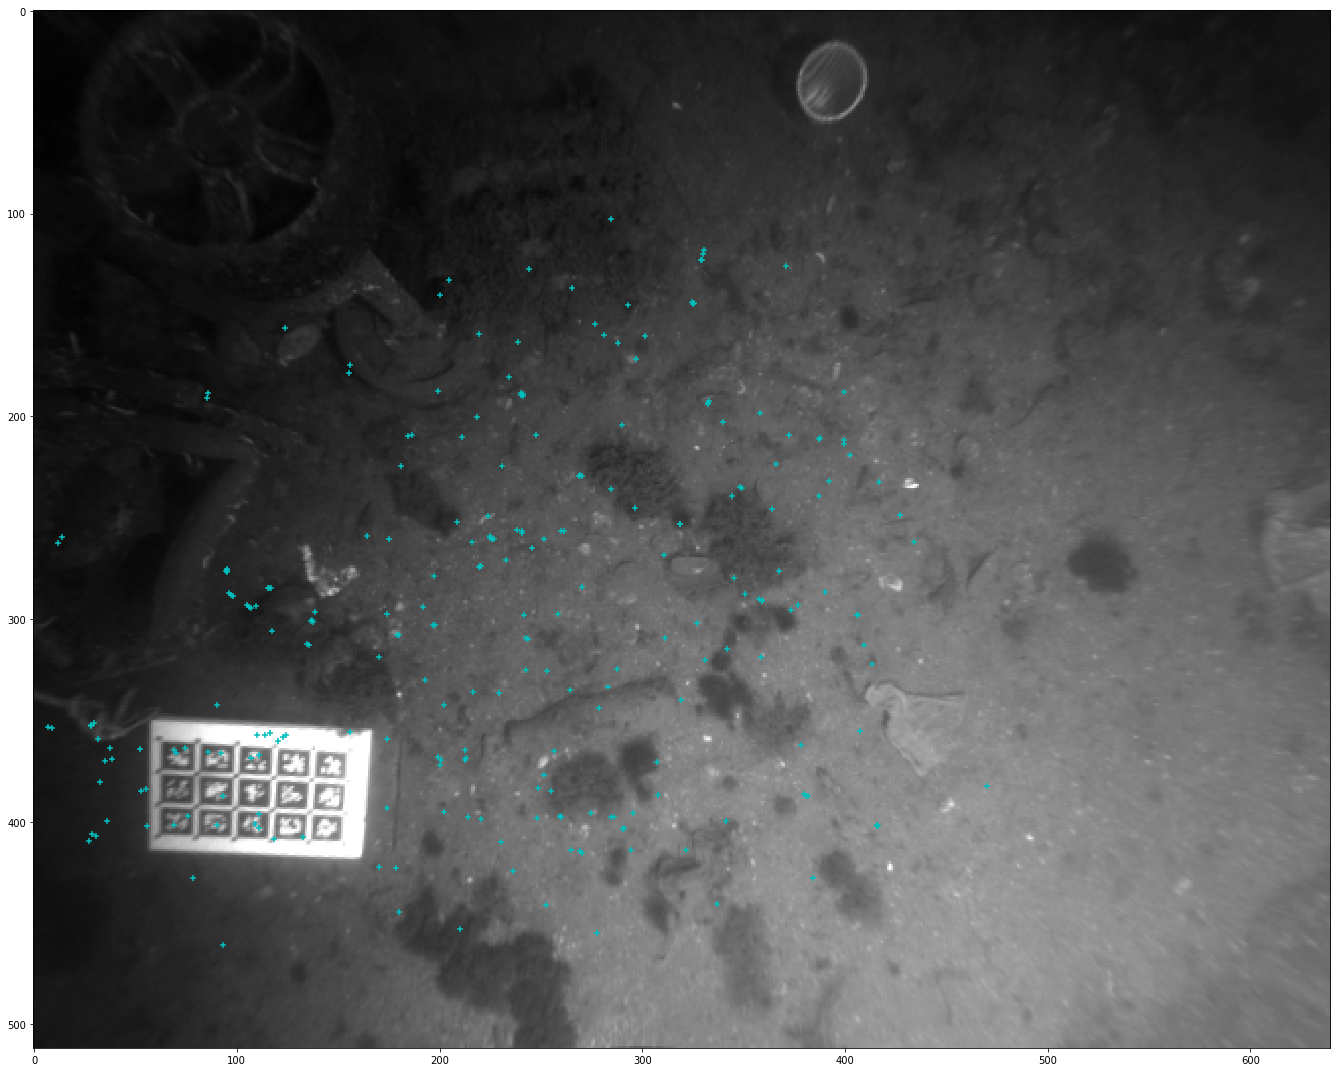

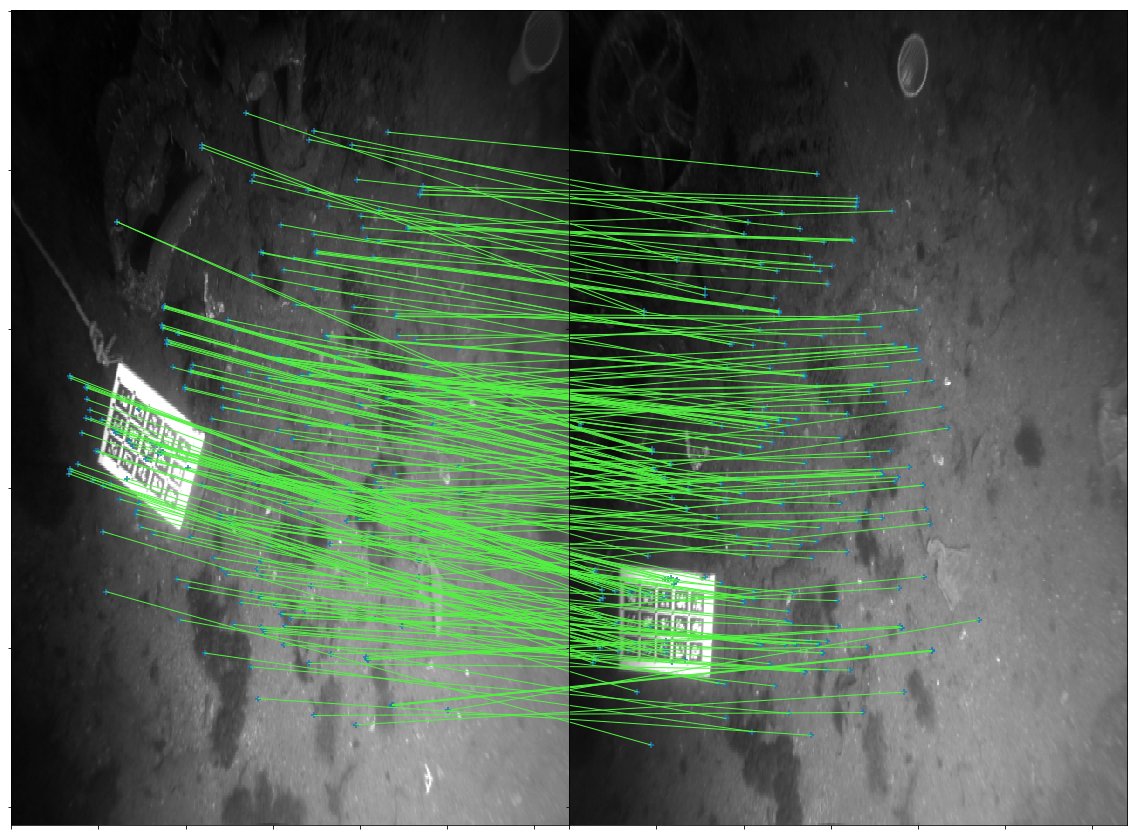

In [28]:
world = toHomogeneous(points[f1])
Twc_f1 = data.K @ inverse_pose[f1]
Twc_f2 = data.K @ inverse_pose[f2]

img1_points = np.array([Twc_f1 @ p for p in world])
img2_points = np.array([Twc_f2 @ p for p in world])

img1_points = fromHomogeneous(img1_points)
img2_points = fromHomogeneous(img2_points)

plot_img(img1, img1_points)
plot_img(img2, img2_points)
plot_corr(img1, img2, img1_points, img2_points, vsplit=True)

In [29]:
try:
    result_file = os.path.join(data.gt_path, data.seq + "_ORB_pose.txt")
except AttributeError:
    result_file = os.path.join(data.gt_path, "ORB_pose.txt")
    
dump_pose_TUM(result_file, np.array(pose), np.array(tframe))

In [30]:
eval(result_file, data.gt_file)

RMSE: 1.9370
